
# Universidad Autónoma de Nuevo León 
# Maestría en Ciencia de Datos
# Procesamiento y Clasificación de Datos
# Alder López Cerda
# Tarea2 : Análisis de Sentimiento



# Usando base de datos Hotel Reviews 

se usara un dataset de comentarios sobre hoteles : https://www.kaggle.com/datasets/datafiniti/hotel-reviews

Se carga los datos

In [288]:
import pandas as pd
df = pd.read_csv('/Users/alder.lopez/Documents/DocsMac/Alder/UANL/ProcesamientoClasificacionDato/T2/HotelReviews/Datafiniti_Hotel_Reviews.csv')
df.head(3)


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com


Eliminacion de columnas que no son parte del enfoque del analisis 

In [289]:
dataset = df.drop(['id', 'dateUpdated','country', 'address', 'categories', 'primaryCategories', 'city','keys','latitude','longitude','postalCode','province','dateAdded','reviews.dateSeen','reviews.sourceURLs','reviews.userCity','reviews.userProvince','reviews.username','sourceURLs','websites'], axis =1)
dataset.head()

,name,reviews.date,reviews.rating,reviews.text,reviews.title
0,Rancho Valencia Resort Spa,2013-11-14T00:00:00Z,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!
1,Rancho Valencia Resort Spa,2014-07-06T00:00:00Z,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity
2,Rancho Valencia Resort Spa,2015-01-02T00:00:00Z,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience
3,Aloft Arundel Mills,2016-05-15T00:00:00Z,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep."
4,Aloft Arundel Mills,2016-07-09T00:00:00Z,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...


In [290]:
dataset.shape

(10000, 5)

In [291]:
# se tomaran 5000 para limitar los datos

In [292]:
N = 5000
dataset = dataset.iloc[:N , :]
dataset.shape

(5000, 5)

In [293]:
# se realiza limpiza de los datos 

In [294]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    
    if text is not None:
        text = re.sub('[^A-Za-z]+', ' ', text) 
    return text


# Cleaning the text in the review column
dataset['Cleaned Reviews'] = dataset['reviews.text'].apply(clean)
dataset.head()

,name,reviews.date,reviews.rating,reviews.text,reviews.title,Cleaned Reviews
0,Rancho Valencia Resort Spa,2013-11-14T00:00:00Z,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...
1,Rancho Valencia Resort Spa,2014-07-06T00:00:00Z,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,Amazing place Everyone was extremely warm and ...
2,Rancho Valencia Resort Spa,2015-01-02T00:00:00Z,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,We booked a night stay at Rancho Valencia to p...
3,Aloft Arundel Mills,2016-05-15T00:00:00Z,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...
4,Aloft Arundel Mills,2016-07-09T00:00:00Z,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...


In [295]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist



dataset['POS tagged'] = dataset['Cleaned Reviews'].apply(token_stop_pos)
dataset.head()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alder.lopez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alder.lopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alder.lopez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alder.lopez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,name,reviews.date,reviews.rating,reviews.text,reviews.title,Cleaned Reviews,POS tagged
0,Rancho Valencia Resort Spa,2013-11-14T00:00:00Z,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...,"[(experience, n), (Rancho, n), (Valencia, n), ..."
1,Rancho Valencia Resort Spa,2014-07-06T00:00:00Z,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,Amazing place Everyone was extremely warm and ...,"[(Amazing, a), (place, n), (Everyone, n), (ext..."
2,Rancho Valencia Resort Spa,2015-01-02T00:00:00Z,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,We booked a night stay at Rancho Valencia to p...,"[(booked, v), (night, n), (stay, n), (Rancho, ..."
3,Aloft Arundel Mills,2016-05-15T00:00:00Z,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...,"[(Currently, r), (bed, n), (writing, n), (past..."
4,Aloft Arundel Mills,2016-07-09T00:00:00Z,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...,"[(live, v), (Md, n), (Aloft, n), (Home, n), (a..."


In [296]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)
dataset.head()

,name,reviews.date,reviews.rating,reviews.text,reviews.title,Cleaned Reviews,POS tagged,Lemma
0,Rancho Valencia Resort Spa,2013-11-14T00:00:00Z,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...,"[(experience, n), (Rancho, n), (Valencia, n), ...",experience Rancho Valencia absolutely perfec...
1,Rancho Valencia Resort Spa,2014-07-06T00:00:00Z,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,Amazing place Everyone was extremely warm and ...,"[(Amazing, a), (place, n), (Everyone, n), (ext...",Amazing place Everyone extremely warm welcom...
2,Rancho Valencia Resort Spa,2015-01-02T00:00:00Z,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,We booked a night stay at Rancho Valencia to p...,"[(booked, v), (night, n), (stay, n), (Rancho, ...",book night stay Rancho Valencia play tennis ...
3,Aloft Arundel Mills,2016-05-15T00:00:00Z,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...,"[(Currently, r), (bed, n), (writing, n), (past...",Currently bed writing past hr dog bark squea...
4,Aloft Arundel Mills,2016-07-09T00:00:00Z,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...,"[(live, v), (Md, n), (Aloft, n), (Home, n), (a...",live Md Aloft Home away home stay night Staf...


In [297]:

dataset[['reviews.text', 'Lemma']]

,reviews.text,Lemma
0,Our experience at Rancho Valencia was absolute...,experience Rancho Valencia absolutely perfec...
1,Amazing place. Everyone was extremely warm and...,Amazing place Everyone extremely warm welcom...
2,We booked a 3 night stay at Rancho Valencia to...,book night stay Rancho Valencia play tennis ...
3,Currently in bed writing this for the past hr ...,Currently bed writing past hr dog bark squea...
4,I live in Md and the Aloft is my Home away fro...,live Md Aloft Home away home stay night Staf...
...,...,...
4995,Ventilation system was blowing cigarette smoke...,Ventilation system blow cigarette smoke room...
4996,This hotel has a lot to offer at a good value....,hotel lot offer good value suite spacious pr...
4997,Staff was very helpful and responsive. The roo...,Staff helpful responsive room pool parking c...
4998,We stayed at this hotel the last week in Decem...,stay hotel last week December weather extrem...


# Analisis de sentimiento usando TextBlob

In [298]:
#pip install -U textblob


In [299]:
#python -m textblob.download_corpora

In [300]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [301]:
fin_data = pd.DataFrame(dataset[['reviews.text', 'Lemma']])

In [302]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,reviews.text,Lemma,Polarity,Analysis
0,Our experience at Rancho Valencia was absolute...,experience Rancho Valencia absolutely perfec...,0.539286,Positive
1,Amazing place. Everyone was extremely warm and...,Amazing place Everyone extremely warm welcom...,0.475000,Positive
2,We booked a 3 night stay at Rancho Valencia to...,book night stay Rancho Valencia play tennis ...,0.484444,Positive
3,Currently in bed writing this for the past hr ...,Currently bed writing past hr dog bark squea...,-0.125000,Negative
4,I live in Md and the Aloft is my Home away fro...,live Md Aloft Home away home stay night Staf...,0.258701,Positive


In [303]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    4455
Negative     468
Neutral       77
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd85db4ac70>,
 [Text(-1.0361342992410354, 0.3693585168048637, 'Positive'),
  Text(1.0170590803645516, -0.41903559162440196, 'Negative'),
  Text(1.3484203400665766, -0.0652884866935836, 'Neutral')],
 [Text(-0.5651641632223828, 0.201468281893562, '89.1%'),
  Text(0.5547594983806645, -0.22856486815876467, '9.4%'),
  Text(0.8490053993011778, -0.04110756569596004, '1.5%')])

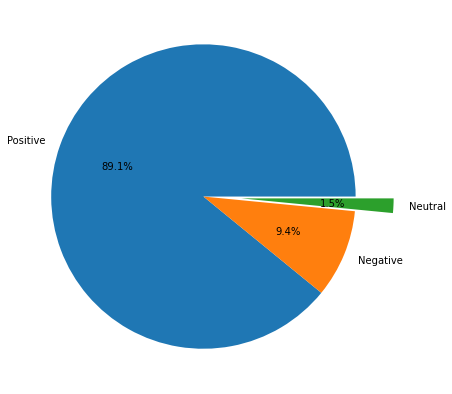

In [304]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


# Analisis de sentimiento usando VADER

In [305]:
#!pip install vaderSentiment


In [306]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [307]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,reviews.text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Our experience at Rancho Valencia was absolute...,experience Rancho Valencia absolutely perfec...,0.539286,Positive,0.9392,Positive
1,Amazing place. Everyone was extremely warm and...,Amazing place Everyone extremely warm welcom...,0.475000,Positive,0.9656,Positive
2,We booked a 3 night stay at Rancho Valencia to...,book night stay Rancho Valencia play tennis ...,0.484444,Positive,0.9763,Positive
3,Currently in bed writing this for the past hr ...,Currently bed writing past hr dog bark squea...,-0.125000,Negative,0.0000,Neutral
4,I live in Md and the Aloft is my Home away fro...,live Md Aloft Home away home stay night Staf...,0.258701,Positive,0.8344,Positive


In [308]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    3883
Neutral      873
Negative     244
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd8a76c30d0>,
 [Text(-0.9163930009420261, 0.774741161824043, 'Positive'),
  Text(0.7217229180087926, -0.8301301281250271, 'Neutral'),
  Text(1.0870981794414065, -0.16798079728105703, 'Negative')],
 [Text(-0.5345625838828485, 0.45193234439735835, '77.7%'),
  Text(0.39366704618661413, -0.4527982517045602, '17.5%'),
  Text(0.5929626433316763, -0.09162588942603109, '4.9%')])

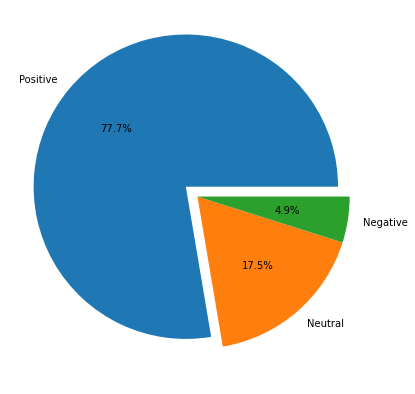

In [309]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Analisis using SentiWordNet

In [310]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = dataset['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/alder.lopez/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,reviews.text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Our experience at Rancho Valencia was absolute...,experience Rancho Valencia absolutely perfec...,0.539286,Positive,0.9392,Positive,Positive
1,Amazing place. Everyone was extremely warm and...,Amazing place Everyone extremely warm welcom...,0.475000,Positive,0.9656,Positive,Positive
2,We booked a 3 night stay at Rancho Valencia to...,book night stay Rancho Valencia play tennis ...,0.484444,Positive,0.9763,Positive,Positive
3,Currently in bed writing this for the past hr ...,Currently bed writing past hr dog bark squea...,-0.125000,Negative,0.0000,Neutral,Neutral
4,I live in Md and the Aloft is my Home away fro...,live Md Aloft Home away home stay night Staf...,0.258701,Positive,0.8344,Positive,Positive


In [311]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    3727
Negative    1046
Neutral      219
0              8
Name: SWN analysis, dtype: int64

In [312]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    3727
Negative    1046
Neutral      219
0              8
Name: SWN analysis, dtype: int64

In [313]:
fin_data

,reviews.text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Our experience at Rancho Valencia was absolute...,experience Rancho Valencia absolutely perfec...,0.539286,Positive,0.9392,Positive,Positive
1,Amazing place. Everyone was extremely warm and...,Amazing place Everyone extremely warm welcom...,0.475000,Positive,0.9656,Positive,Positive
2,We booked a 3 night stay at Rancho Valencia to...,book night stay Rancho Valencia play tennis ...,0.484444,Positive,0.9763,Positive,Positive
3,Currently in bed writing this for the past hr ...,Currently bed writing past hr dog bark squea...,-0.125000,Negative,0.0000,Neutral,Neutral
4,I live in Md and the Aloft is my Home away fro...,live Md Aloft Home away home stay night Staf...,0.258701,Positive,0.8344,Positive,Positive
...,...,...,...,...,...,...,...
4995,Ventilation system was blowing cigarette smoke...,Ventilation system blow cigarette smoke room...,0.175000,Positive,0.0772,Neutral,Negative
4996,This hotel has a lot to offer at a good value....,hotel lot offer good value suite spacious pr...,0.336538,Positive,0.9806,Positive,Positive
4997,Staff was very helpful and responsive. The roo...,Staff helpful responsive room pool parking c...,-0.039167,Negative,0.8316,Positive,Positive
4998,We stayed at this hotel the last week in Decem...,stay hotel last week December weather extrem...,0.134722,Positive,0.8360,Positive,Positive


In [314]:
# se agrego el cero en explode = (0.1, 0, 0,0) 

([<matplotlib.patches.Wedge at 0x7fd8a76ffdf0>,
 [Text(-0.8361776364080531, 0.8607014350929374, 'Positive'),
  Text(0.6465638275138399, -0.8899186574910393, 'Negative'),
  Text(1.0880307005492336, -0.16183075932079216, 'Neutral'),
  Text(1.0999861038494039, -0.005529135394310538, '0')],
 [Text(-0.48777028790469756, 0.5020758371375468, '74.5%'),
  Text(0.3526711786439127, -0.48541017681329407, '20.9%'),
  Text(0.5934712912086728, -0.08827132326588662, '4.4%'),
  Text(0.5999924202814929, -0.0030158920332602934, '0.2%')])

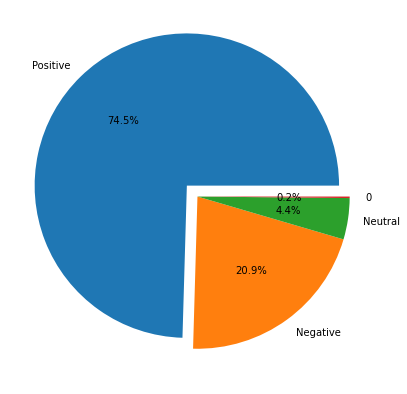

In [315]:

plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0,0), autopct='%1.1f%%', shadow=False)


In [316]:
# se agrega el cero al ultimmo pie

([<matplotlib.patches.Wedge at 0x7fd8a7754df0>,
 [Text(-0.766496166707382, 0.7889763155018593, 'Positive'),
  Text(0.6465638275138399, -0.8899186574910393, 'Negative'),
  Text(1.0880307005492336, -0.16183075932079216, 'Neutral'),
  Text(1.3499829456333592, -0.00678575707483566, '0')],
 [Text(-0.4180888182040265, 0.43035071754646864, '74.5%'),
  Text(0.3526711786439127, -0.48541017681329407, '20.9%'),
  Text(0.5934712912086728, -0.08827132326588662, '4.4%'),
  Text(0.8499892620654483, -0.004272513713785416, '0.2%')])

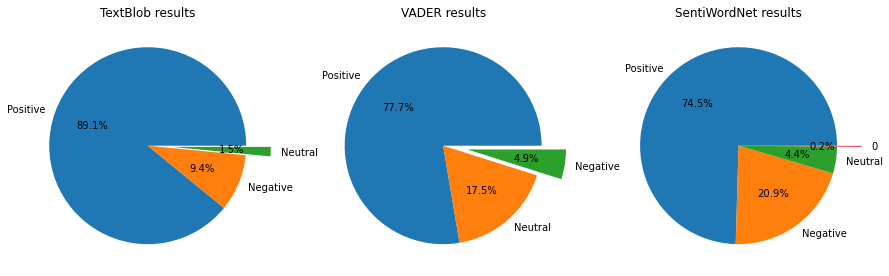

In [317]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)



plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0,0, 0.25), autopct='%1.1f%%', shadow=False)

In [318]:
# se tomare fin_data como input al procesamiento con RandomForest

In [319]:
fin_data

,reviews.text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Our experience at Rancho Valencia was absolute...,experience Rancho Valencia absolutely perfec...,0.539286,Positive,0.9392,Positive,Positive
1,Amazing place. Everyone was extremely warm and...,Amazing place Everyone extremely warm welcom...,0.475000,Positive,0.9656,Positive,Positive
2,We booked a 3 night stay at Rancho Valencia to...,book night stay Rancho Valencia play tennis ...,0.484444,Positive,0.9763,Positive,Positive
3,Currently in bed writing this for the past hr ...,Currently bed writing past hr dog bark squea...,-0.125000,Negative,0.0000,Neutral,Neutral
4,I live in Md and the Aloft is my Home away fro...,live Md Aloft Home away home stay night Staf...,0.258701,Positive,0.8344,Positive,Positive
...,...,...,...,...,...,...,...
4995,Ventilation system was blowing cigarette smoke...,Ventilation system blow cigarette smoke room...,0.175000,Positive,0.0772,Neutral,Negative
4996,This hotel has a lot to offer at a good value....,hotel lot offer good value suite spacious pr...,0.336538,Positive,0.9806,Positive,Positive
4997,Staff was very helpful and responsive. The roo...,Staff helpful responsive room pool parking c...,-0.039167,Negative,0.8316,Positive,Positive
4998,We stayed at this hotel the last week in Decem...,stay hotel last week December weather extrem...,0.134722,Positive,0.8360,Positive,Positive


In [321]:
# se toma el valor del sentimiento y el texto 

In [322]:
features = fin_data.iloc[:, 0].values
labels = fin_data.iloc[:, 3].values

In [323]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [324]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

processed_features = vectorizer.fit_transform(processed_features).toarray()

In [325]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [326]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

Usando la libreria de sklearn, randomforestclassifier, podemos entrenar un modelo de aprendizaje de maquina que nos ayuda a predecir el sentimiento del tweet.

In [327]:
predictions = text_classifier.predict(X_test)


In [328]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 29   0  58]
 [  0   3  10]
 [  3   3 894]]
              precision    recall  f1-score   support

    Negative       0.91      0.33      0.49        87
     Neutral       0.50      0.23      0.32        13
    Positive       0.93      0.99      0.96       900

    accuracy                           0.93      1000
   macro avg       0.78      0.52      0.59      1000
weighted avg       0.92      0.93      0.91      1000

0.926


Al final tenemos una exactitud del 92 porciento en la prediccion de analisis de sentimiento, el pudiera variar  si utilizamos otro tipo de modelo, como regresion logistica, Maquina de soporte vectorial y k vecinos.
